Un Supervised Learning

In [1]:
import numpy as np

In [7]:
np.random.seed(10)
num_clusters = 3

In [8]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=num_clusters)

In [13]:
X

array([[-1.48354264,  1.34998014],
       [ 5.13301016,  7.83885416],
       [ 6.06692201,  6.99886778],
       ...,
       [-2.3893883 , -2.00317119],
       [ 4.87722841,  7.27569685],
       [-1.15881157,  0.12552709]], shape=(1000, 2))

In [16]:
y[:5]

array([0, 2, 2, 1, 2])

In [17]:
import matplotlib.pyplot as plt

In [24]:
K = num_clusters
max_iterations = 100
plot_figure = True
num_samples = X.shape[0]
num_features = X.shape[1]

In [19]:
centroids = np.zeros((K, num_features)) # 3 centroids for 3 class with 2 dimensions or feature

In [20]:
centroids

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [25]:
num_samples # num of samples

1000

In [26]:
np.random.choice(range(num_samples)) # choose random value with number of samples

np.int64(973)

choose random value with number of samples as index of sample

find sample corresponding to the index 

assinged sample to a specific centroid among 3 centroids for 3 class


In [27]:
for k in range(K):
    centroid = X[np.random.choice(range(num_samples))]
    centroids[k] = centroid

In [28]:
centroids

array([[ 0.90140174, -5.08699173],
       [-0.72233512,  1.98647057],
       [ 4.9507342 ,  8.24502979]])

In [29]:
def initialize_random_centroids(X):
        centroids = np.zeros((K, num_features))

        for k in range(K):
            centroid = X[np.random.choice(range(num_samples))]
            centroids[k] = centroid

        return centroids

In [30]:
clusters = [[],[],[]] # for 3 class or ccentroids

In [31]:
clusters = [[] for _ in range(K)]

In [32]:
clusters

[[], [], []]

In [ ]:
# This line of code calculates the index of the closest centroid to a given point using the Euclidean distance metric.
# Breakdown:
# (point - centroids): Calculates the difference between the point and each centroid.
# ** 2: Squares each element of the difference, which is part of the Euclidean distance formula.
# np.sum(..., axis=1): Sums the squared differences along the rows (axis=1), resulting in the sum of squared differences for each centroid.
# np.sqrt(...): Calculates the square root of the sum of squared differences, giving the Euclidean distance between the point and each centroid.
# np.argmin(...): Returns the index of the minimum Euclidean distance, which corresponds to the closest centroid.
# Example:
# Suppose we have a point [1, 2] and centroids [[0, 0], [3, 4], [6, 8]]. The code would calculate the Euclidean distances as follows:
# Distance to centroid [0, 0]: √((1-0)^2 + (2-0)^2) = √(1 + 4) = √5
# Distance to centroid [3, 4]: √((1-3)^2 + (2-4)^2) = √(4 + 4) = √8
# Distance to centroid [6, 8]: √((1-6)^2 + (2-8)^2) = √(25 + 36) = √61
# The code would return the index of the minimum distance, which is 0 in this case, corresponding to the closest centroid [0, 0].

check every point distance from 3 centroid and from which centroid it is closest and then assign this point into the class in which the closest centroid belongs

In [37]:
for point_idx, point in enumerate(X):
    closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
    print(closest_centroid)
    clusters[closest_centroid].append(point_idx)

1
2
2
0
2
2
1
2
2
2
1
2
0
0
1
0
1
0
1
1
2
1
2
0
2
1
0
1
1
1
2
0
2
2
0
2
2
1
1
0
2
0
0
0
2
2
0
0
0
2
0
2
1
1
1
2
0
0
0
2
2
0
2
0
2
0
0
2
1
2
1
0
1
2
0
0
1
2
0
2
2
1
1
2
2
1
1
0
2
1
0
0
0
2
1
1
1
1
1
0
2
0
1
1
2
0
0
1
2
0
1
0
1
2
0
0
0
0
0
1
1
2
2
0
1
2
1
2
1
1
1
0
1
1
1
2
0
0
1
1
0
0
1
0
1
0
1
2
0
2
1
2
2
2
1
2
1
0
2
0
1
1
1
0
1
2
0
2
2
0
2
0
1
0
0
1
0
1
0
2
1
0
2
1
2
0
1
2
1
2
0
2
1
0
1
2
1
0
2
0
0
2
1
0
0
1
2
0
0
0
0
2
0
1
0
1
0
1
1
0
1
2
2
1
1
0
2
1
2
2
0
0
0
1
0
2
2
2
2
1
0
0
1
1
1
1
2
0
2
0
1
0
2
1
1
0
1
1
2
2
1
0
0
2
1
0
2
0
2
0
2
2
0
1
2
2
0
0
2
2
0
1
1
2
2
2
1
0
1
2
1
1
1
2
1
1
0
1
0
2
0
0
1
0
1
1
1
1
0
0
0
0
0
2
1
0
0
1
0
2
2
2
1
2
2
0
2
0
1
0
1
1
0
0
1
2
2
0
1
2
0
1
2
2
0
1
0
1
2
0
1
0
2
1
1
2
0
1
1
2
1
0
1
2
2
2
2
2
0
2
1
2
1
2
1
2
1
2
0
2
1
2
1
2
0
2
2
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
2
1
2
1
1
1
2
0
0
0
2
1
1
0
2
2
0
2
1
1
1
2
0
1
2
2
2
0
2
2
0
2
0
0
1
2
0
2
1
0
2
0
1
1
1
1
1
2
1
2
0
0
0
1
2
2
2
0
0
0
2
1
2
2
0
0
0
0
1
2
2
1
0
1
2
0
0
1
1
0
0
1
1
0
2
1
2
1
1
1
0
2
0
0
1
1
2
0


In [35]:
clusters[0] # first cluster

[3,
 12,
 13,
 15,
 17,
 23,
 26,
 31,
 34,
 39,
 41,
 42,
 43,
 46,
 47,
 48,
 50,
 56,
 57,
 58,
 61,
 63,
 65,
 66,
 71,
 74,
 75,
 78,
 87,
 90,
 91,
 92,
 99,
 101,
 105,
 106,
 109,
 111,
 114,
 115,
 116,
 117,
 118,
 123,
 131,
 136,
 137,
 140,
 141,
 143,
 145,
 148,
 157,
 159,
 163,
 166,
 169,
 171,
 173,
 174,
 176,
 178,
 181,
 185,
 190,
 193,
 197,
 199,
 200,
 203,
 204,
 207,
 208,
 209,
 210,
 212,
 214,
 216,
 219,
 225,
 230,
 231,
 232,
 234,
 240,
 241,
 247,
 249,
 251,
 255,
 261,
 262,
 265,
 267,
 269,
 272,
 276,
 277,
 280,
 287,
 296,
 298,
 300,
 301,
 303,
 308,
 309,
 310,
 311,
 312,
 315,
 316,
 318,
 325,
 327,
 329,
 332,
 333,
 337,
 340,
 344,
 346,
 349,
 351,
 356,
 361,
 368,
 378,
 384,
 387,
 388,
 391,
 392,
 393,
 394,
 397,
 401,
 409,
 410,
 411,
 415,
 418,
 424,
 429,
 432,
 434,
 435,
 438,
 441,
 443,
 452,
 453,
 454,
 459,
 460,
 461,
 466,
 467,
 468,
 469,
 474,
 477,
 478,
 481,
 482,
 485,
 492,
 494,
 495,
 499,
 501,
 503,
 5

In [36]:
clusters[1] # second cluster

[0,
 6,
 10,
 14,
 16,
 18,
 19,
 21,
 25,
 27,
 28,
 29,
 37,
 38,
 52,
 53,
 54,
 68,
 70,
 72,
 76,
 81,
 82,
 85,
 86,
 89,
 94,
 95,
 96,
 97,
 98,
 102,
 103,
 107,
 110,
 112,
 119,
 120,
 124,
 126,
 128,
 129,
 130,
 132,
 133,
 134,
 138,
 139,
 142,
 144,
 146,
 150,
 154,
 156,
 160,
 161,
 162,
 164,
 172,
 175,
 177,
 180,
 183,
 186,
 188,
 192,
 194,
 196,
 202,
 205,
 213,
 215,
 217,
 218,
 220,
 223,
 224,
 227,
 233,
 239,
 242,
 243,
 244,
 245,
 250,
 253,
 254,
 256,
 257,
 260,
 264,
 273,
 281,
 282,
 286,
 288,
 290,
 291,
 292,
 294,
 295,
 297,
 302,
 304,
 305,
 306,
 307,
 314,
 317,
 322,
 328,
 330,
 331,
 334,
 338,
 341,
 345,
 347,
 350,
 353,
 354,
 357,
 358,
 360,
 362,
 370,
 372,
 374,
 376,
 380,
 382,
 389,
 390,
 395,
 396,
 398,
 399,
 400,
 403,
 405,
 406,
 407,
 413,
 414,
 420,
 421,
 422,
 425,
 436,
 440,
 444,
 445,
 446,
 447,
 448,
 450,
 455,
 463,
 470,
 473,
 475,
 479,
 480,
 483,
 484,
 487,
 489,
 490,
 491,
 496,
 497,
 500,
 

In [38]:
clusters[2] # third cluster

[1,
 2,
 4,
 5,
 7,
 8,
 9,
 11,
 20,
 22,
 24,
 30,
 32,
 33,
 35,
 36,
 40,
 44,
 45,
 49,
 51,
 55,
 59,
 60,
 62,
 64,
 67,
 69,
 73,
 77,
 79,
 80,
 83,
 84,
 88,
 93,
 100,
 104,
 108,
 113,
 121,
 122,
 125,
 127,
 135,
 147,
 149,
 151,
 152,
 153,
 155,
 158,
 165,
 167,
 168,
 170,
 179,
 182,
 184,
 187,
 189,
 191,
 195,
 198,
 201,
 206,
 211,
 221,
 222,
 226,
 228,
 229,
 235,
 236,
 237,
 238,
 246,
 248,
 252,
 258,
 259,
 263,
 266,
 268,
 270,
 271,
 274,
 275,
 278,
 279,
 283,
 284,
 285,
 289,
 293,
 299,
 313,
 319,
 320,
 321,
 323,
 324,
 326,
 335,
 336,
 339,
 342,
 343,
 348,
 352,
 355,
 359,
 363,
 364,
 365,
 366,
 367,
 369,
 371,
 373,
 375,
 377,
 379,
 381,
 383,
 385,
 386,
 402,
 404,
 408,
 412,
 416,
 417,
 419,
 423,
 426,
 427,
 428,
 430,
 431,
 433,
 437,
 439,
 442,
 449,
 451,
 456,
 457,
 458,
 462,
 464,
 465,
 471,
 472,
 476,
 486,
 488,
 493,
 498,
 502,
 508,
 510,
 512,
 519,
 523,
 525,
 531,
 537,
 538,
 545,
 553,
 556,
 558,
 559,

In [39]:
def create_clusters(X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters


In [40]:
old_centroids = centroids

In [45]:
old_centroids

array([[ 0.90140174, -5.08699173],
       [-0.72233512,  1.98647057],
       [ 4.9507342 ,  8.24502979]])

In [42]:
num_features

2

In [47]:
K

3

In [48]:
centroids = np.zeros((K, num_features)) # must use double parentheses

In [49]:
centroids

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [52]:
clusters[0] # index of sample

[3,
 12,
 13,
 15,
 17,
 23,
 26,
 31,
 34,
 39,
 41,
 42,
 43,
 46,
 47,
 48,
 50,
 56,
 57,
 58,
 61,
 63,
 65,
 66,
 71,
 74,
 75,
 78,
 87,
 90,
 91,
 92,
 99,
 101,
 105,
 106,
 109,
 111,
 114,
 115,
 116,
 117,
 118,
 123,
 131,
 136,
 137,
 140,
 141,
 143,
 145,
 148,
 157,
 159,
 163,
 166,
 169,
 171,
 173,
 174,
 176,
 178,
 181,
 185,
 190,
 193,
 197,
 199,
 200,
 203,
 204,
 207,
 208,
 209,
 210,
 212,
 214,
 216,
 219,
 225,
 230,
 231,
 232,
 234,
 240,
 241,
 247,
 249,
 251,
 255,
 261,
 262,
 265,
 267,
 269,
 272,
 276,
 277,
 280,
 287,
 296,
 298,
 300,
 301,
 303,
 308,
 309,
 310,
 311,
 312,
 315,
 316,
 318,
 325,
 327,
 329,
 332,
 333,
 337,
 340,
 344,
 346,
 349,
 351,
 356,
 361,
 368,
 378,
 384,
 387,
 388,
 391,
 392,
 393,
 394,
 397,
 401,
 409,
 410,
 411,
 415,
 418,
 424,
 429,
 432,
 434,
 435,
 438,
 441,
 443,
 452,
 453,
 454,
 459,
 460,
 461,
 466,
 467,
 468,
 469,
 474,
 477,
 478,
 481,
 482,
 485,
 492,
 494,
 495,
 499,
 501,
 503,
 5

In [51]:
X[clusters[0]]

array([[-1.09725043, -5.93865654],
       [ 0.46713636, -5.14665782],
       [ 2.43224626, -6.69221468],
       ...,
       [ 0.40006309, -5.81270388],
       [-0.34153287, -7.79665115],
       [ 0.67932948, -4.49326651]], shape=(680, 2))

In [53]:
np.mean(X[clusters[0]], axis=0)

array([ 0.60213866, -5.72253803])

In [54]:
for idx, cluster in enumerate(clusters):  # clusters contains index of sample
    new_centroid = np.mean(X[cluster], axis=0) # find mean(center) samples as centroids
    centroids[idx] = new_centroid

In [55]:
centroids

array([[ 0.60213866, -5.72253803],
       [-1.24447499,  0.18583975],
       [ 4.87935122,  7.92115038]])

In [56]:
def calculate_new_centroids(clusters, X):
    centroids = np.zeros((K, num_features))
    for idx, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centroid

    return centroids

In [57]:
diff = centroids - old_centroids

In [58]:
diff

array([[-0.29926308, -0.63554631],
       [-0.52213986, -1.80063082],
       [-0.07138298, -0.32387942]])

In [59]:
diff.any()

np.True_

In [60]:
if not diff.any():  # if no difference is found
    print("Termination criterion satisfied")


In [61]:
y_pred = np.zeros(num_samples)

In [64]:
y_pred[:5]

array([0., 0., 0., 0., 0.])

In [65]:
for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

In [66]:
y_pred[:5]

array([1., 2., 2., 0., 2.])

In [67]:
def predict_cluster( clusters, X):
        y_pred = np.zeros(num_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

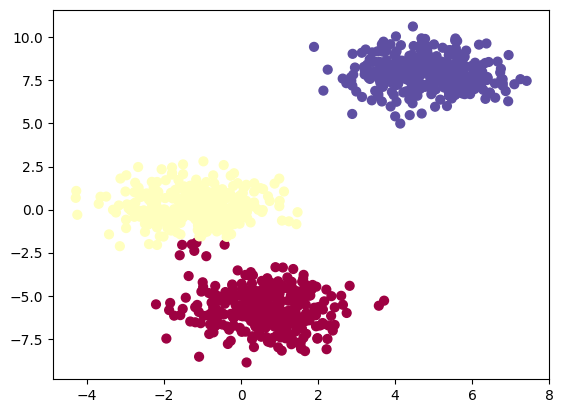

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral)

In [69]:
def plot_fig( X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

In [71]:
def fit(X):
        centroids = initialize_random_centroids(X)

        for it in range(max_iterations):
            clusters = create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = predict_cluster(clusters, X)

        if plot_figure:
            plot_fig(X, y_pred)

        return y_pred

Termination criterion satisfied


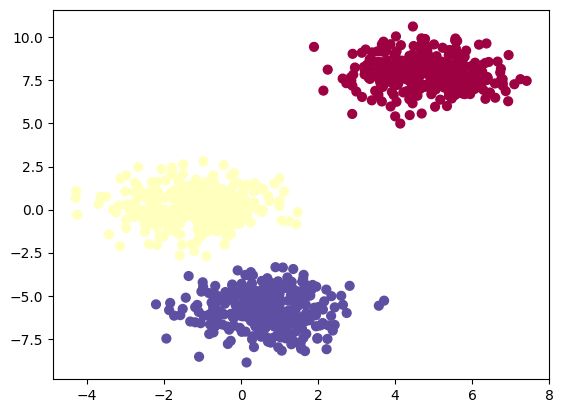

In [72]:
y_pred = fit(X)